# Homework 2 - balancing, transformations, and dimensionality reduction (deadline 21. 12. 2025, 23:59)

In short, the main task is to play with balancing, binning, transformations, and dimensionality reduction to obtain the best results for the binary classification task.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0). Split the dataset into a train, validation, and test set and **use these parts correctly (!)** in the following steps.
  1. Choose at least one classification algorithm whose performance is to be improved in the following steps.
  1. Use at least two binning methods (on features of your choice, with your choice of parameters) and comment on their effects on classification performance. _I.e., one kind of classifier trained for each binning and a comparison of the effect of binning methods against each other._ _(4 points, depends on creativity)_ 
  1. Use at least two data balancing techniques on the correct part of the dataset and comment on its effects on classification performance. Focus on the comparison of methods between each other. _I.e., one type of classifier trained for each balancing and a comparison of the effect of balancing methods against each other._ **Just copied code from tutorial four will not be accepted.** _(6 points, depends on creativity)_
  1. Transform the features appropriately and prepare new ones (i.e., feature engineering) - focus on the increase in the model's performance (possibly in combination with further steps). _(5 points, depends on creativity)_ 
  1. Try to find some suitable subset of features - use at least two feature selection methods. Evaluate your choice on the validation set and discuss the influence. Do not use PCA (principal component analysis) in this step. Manual selection will not be accepted. _(4 points, depends on creativity)_
  1. Use PCA to reduce the dimensionality. Discuss the influence of the number of principal components. _(4 points)_
  1. Try to find the best combination of the previous steps and run final classification tests on the correct part of the dataset - first for the original data, second for the best-found combination of the previous preprocessing steps. Compare the results and discuss (give a comment, use graphs, and so on). _(5 points)_

All your steps, choices, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for _2 points_ together with the final presentation of the solution.

**If you do all this properly, you will obtain 30 points.**

### FAQ

* Select the appropriate metric to evaluate the classification results.
* In steps 2 and 3, you are comparing methods against each other, not their effect on unadjusted data. However, you can comment on that, too.
* You choose the subset of features only in step 2 because of the binning methods. In the other steps, you work with the whole dataset.

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

  
## Data description

* The dataset can be downloaded [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0).
* The data are devoted to the binary classification task. The aim is to predict the probability that a driver will initiate an auto insurance claim next year.
* The target feature is called 'y' and signifies whether or not a claim was filed for that policyholder.
* To fulfill the task, one does not need to know the meaning of predictors.
* Predictors that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix _bin_ to indicate binary features and the postfix _cat_ to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation.
* While using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), control the shuffling of data by random_state parameter. Do not use shuffle=False, probably never (can cause systematic error).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   y             595212 non-null  int64  
 1   xind_01       595212 non-null  int64  
 2   xind_02_cat   595212 non-null  int64  
 3   xind_03       595212 non-null  int64  
 4   xind_04_cat   595212 non-null  int64  
 5   xind_05_cat   595212 non-null  int64  
 6   xind_06_bin   595212 non-null  int64  
 7   xind_07_bin   595212 non-null  int64  
 8   xind_08_bin   595212 non-null  int64  
 9   xind_09_bin   595212 non-null  int64  
 10  xind_10_bin   595212 non-null  int64  
 11  xind_11_bin   595212 non-null  int64  
 12  xind_12_bin   595212 non-null  int64  
 13  xind_13_bin   595212 non-null  int64  
 14  xind_14       595212 non-null  int64  
 15  xind_15       595212 non-null  int64  
 16  xind_16_bin   595212 non-null  int64  
 17  xind_17_bin   595212 non-null  int64  
 18  xind

In [7]:
df.nunique()

y                   2
xind_01             8
xind_02_cat         5
xind_03            12
xind_04_cat         3
xind_05_cat         8
xind_06_bin         2
xind_07_bin         2
xind_08_bin         2
xind_09_bin         2
xind_10_bin         2
xind_11_bin         2
xind_12_bin         2
xind_13_bin         2
xind_14             5
xind_15            14
xind_16_bin         2
xind_17_bin         2
xind_18_bin         2
xreg_01            10
xreg_02            19
xreg_03          5013
xcar_01_cat        13
xcar_02_cat         3
xcar_03_cat         3
xcar_04_cat        10
xcar_05_cat         3
xcar_06_cat        18
xcar_07_cat         3
xcar_08_cat         2
xcar_09_cat         6
xcar_10_cat         3
xcar_11_cat       104
xcar_11             5
xcar_12           184
xcar_13         70482
xcar_14           850
xcar_15            15
xcalc_01           10
xcalc_02           10
xcalc_03           10
xcalc_04            6
xcalc_05            7
xcalc_06           11
xcalc_07           10
xcalc_08  

In [9]:
df.replace(-1, np.nan).isnull().sum()

y                    0
xind_01              0
xind_02_cat        216
xind_03              0
xind_04_cat         83
xind_05_cat       5809
xind_06_bin          0
xind_07_bin          0
xind_08_bin          0
xind_09_bin          0
xind_10_bin          0
xind_11_bin          0
xind_12_bin          0
xind_13_bin          0
xind_14              0
xind_15              0
xind_16_bin          0
xind_17_bin          0
xind_18_bin          0
xreg_01              0
xreg_02              0
xreg_03         107772
xcar_01_cat        107
xcar_02_cat          5
xcar_03_cat     411231
xcar_04_cat          0
xcar_05_cat     266551
xcar_06_cat          0
xcar_07_cat      11489
xcar_08_cat          0
xcar_09_cat        569
xcar_10_cat          0
xcar_11_cat          0
xcar_11              5
xcar_12              1
xcar_13              0
xcar_14          42620
xcar_15              0
xcalc_01             0
xcalc_02             0
xcalc_03             0
xcalc_04             0
xcalc_05             0
xcalc_06   

In [11]:
RANDOM_STATE = 42

## Splitting to train, test and validating sets.

In [14]:
X = df.drop(columns=['y'])
y = df['y']

In [16]:
print("Value counts of target feature: ")
print(y.value_counts())

print("Percentage of classes of target feature: ")
print(y.value_counts(normalize=True) * 100)

Value counts of target feature: 
y
0    573518
1     21694
Name: count, dtype: int64
Percentage of classes of target feature: 
y
0    96.355248
1     3.644752
Name: proportion, dtype: float64


As we can see target feature is very unbalanced

Dataset will be divided to train, validation and test sets(60%, 20%, 20% resp.) 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=RANDOM_STATE)

In [22]:
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)
print("Validation set shape: ", X_val.shape)

Training set shape:  (357126, 57)
Testing set shape:  (119043, 57)
Validation set shape:  (119043, 57)


## Classificator

For this task desicion tree classificator was choosen.

In [26]:
def decision_tree_train_validate(X_train, y_train, X_val):
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    return clf, y_pred

Next method will print confusion maxrix, including normalized. And print accuraty and F1 score

In [29]:
def print_results(y, y_pred):
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    cm = confusion_matrix(y, y_pred)
    cm_norm = confusion_matrix(y, y_pred, normalize='true')

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # counts
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format="d", ax=axes[0], colorbar=False)
    axes[0].set_title("Confusion matrix")
    axes[0].set_ylabel("True label")
    axes[0].set_xlabel("Predicted label")

    # normalized
    disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm * 100)
    disp_norm.plot(cmap='Blues', values_format=".2f", ax=axes[1])
    axes[1].set_title("Normalized confusion matrix") 
    axes[1].set_ylabel("True label")
    axes[1].set_xlabel("Predicted label")

    plt.tight_layout()
    plt.show()
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")

In [31]:
dt_reg, dt_y_pred_reg = decision_tree_train_validate(X_train, y_train, X_val)

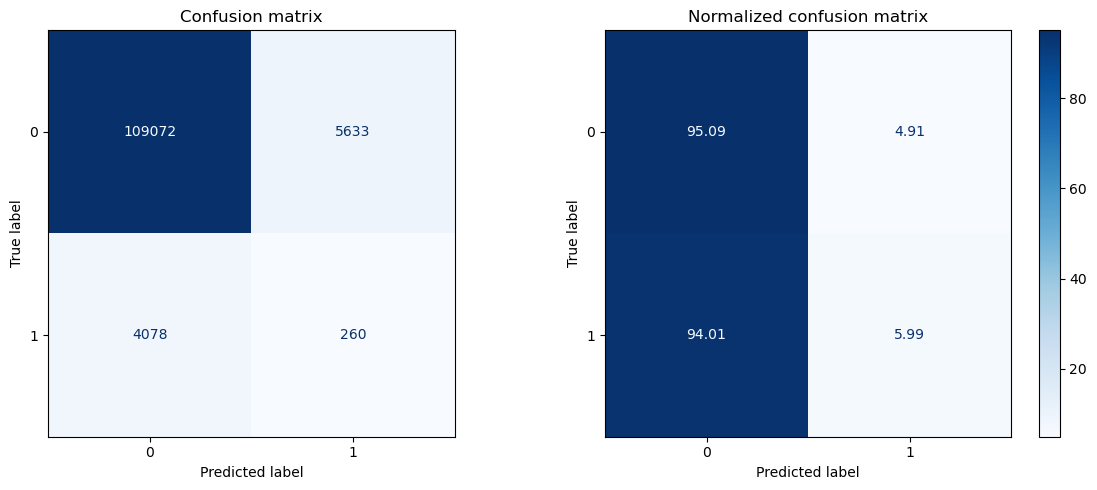

Accuracy: 0.9184
F1-score: 0.0508


In [33]:
print_results(y_val, dt_y_pred_reg)

Accuracy is high, but the F1-score is very low due to class imbalance. The classifier correctly predicts most 0 labels, but it misclassifies the majority of 1 labels as 0.

## Binding methods

For this task equal width and equal depth/frequency binning are used.

All features are numerical, but some of them actually represent categorical or binary values.

In [39]:
num_features = [
    f for f in X.columns
    if "_cat" not in f and "_bin" not in f
]

In [41]:
X[num_features].nunique()

xind_01         8
xind_03        12
xind_14         5
xind_15        14
xreg_01        10
xreg_02        19
xreg_03      5013
xcar_11         5
xcar_12       184
xcar_13     70482
xcar_14       850
xcar_15        15
xcalc_01       10
xcalc_02       10
xcalc_03       10
xcalc_04        6
xcalc_05        7
xcalc_06       11
xcalc_07       10
xcalc_08       11
xcalc_09        8
xcalc_10       26
xcalc_11       20
xcalc_12       11
xcalc_13       14
xcalc_14       24
dtype: int64

For binning let's select only features that contains more 100 unique values.

In [44]:
features_for_binning = X[num_features].nunique()[X[num_features].nunique() > 100].index.tolist()
features_for_binning

['xreg_03', 'xcar_12', 'xcar_13', 'xcar_14']

Adjusting training and validation sets.

In [47]:
X_train_equal_width = X_train.copy()
X_val_equal_width = X_val.copy()
equal_width_binner = KBinsDiscretizer(encode='ordinal', strategy='uniform', subsample=200_000)
equal_width_binner.fit(X_train[features_for_binning])
X_train_equal_width[features_for_binning] = equal_width_binner.transform(X_train_equal_width[features_for_binning])
X_val_equal_width[features_for_binning] = equal_width_binner.transform(X_val_equal_width[features_for_binning])

In [49]:
X_train_equal_width[features_for_binning].nunique()

xreg_03    5
xcar_12    5
xcar_13    5
xcar_14    3
dtype: int64

Adjusting training and validation sets.

In [52]:
X_train_equal_freq = X_train.copy()
X_val_equal_freq = X_val.copy()
equal_freq_binner = KBinsDiscretizer(encode='ordinal', strategy='quantile', subsample=200_000)
equal_freq_binner.fit(X_train[features_for_binning])
X_train_equal_freq[features_for_binning] = equal_freq_binner.transform(X_train_equal_freq[features_for_binning])
X_val_equal_freq[features_for_binning] = equal_freq_binner.transform(X_val_equal_freq[features_for_binning])

In [54]:
X_train_equal_freq[features_for_binning].nunique()

xreg_03    5
xcar_12    5
xcar_13    5
xcar_14    5
dtype: int64

In [56]:
clf_equal_width, y_pred_width = decision_tree_train_validate(X_train_equal_width, y_train, X_val_equal_width)
clf_equal_freq, y_pred_freq = decision_tree_train_validate(X_train_equal_freq, y_train, X_val_equal_freq)

Result of width binning:



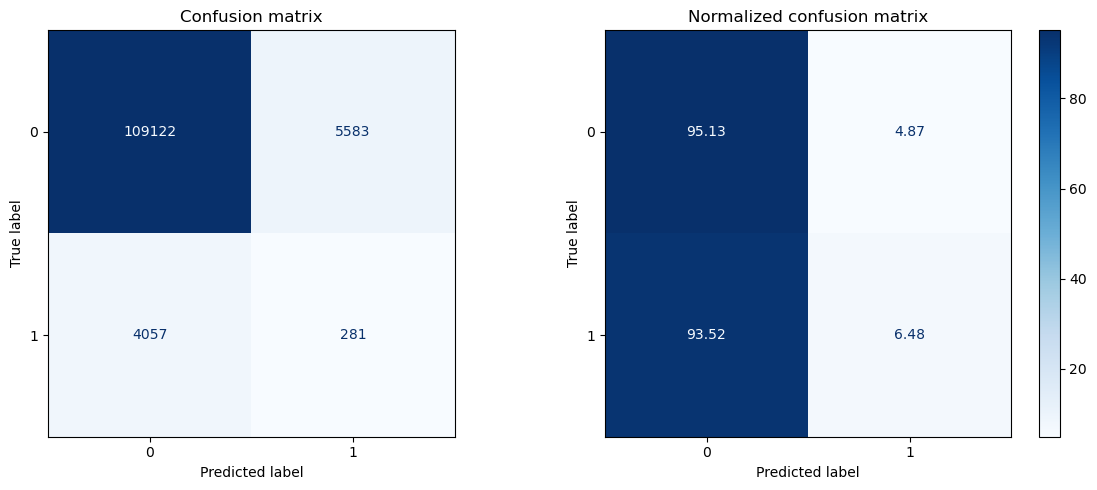

Accuracy: 0.9190
F1-score: 0.0551


In [58]:
print('Result of width binning:\n')
print_results(y_val, y_pred_width)


Result of equal binning:



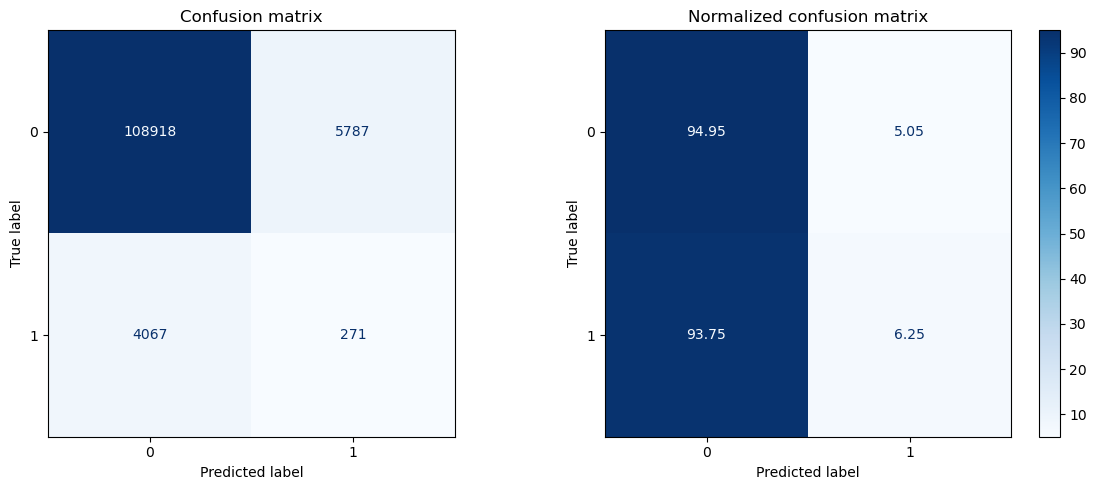

Accuracy: 0.9172
F1-score: 0.0521


In [60]:
print('\nResult of equal binning:\n')
print_results(y_val, y_pred_freq)

As we can see binning methods did not help us, F1-score becomed lower.

## Balancing

For this task two techniques have been chosen:
- SMOTE - creates synthetic samples of the minority class.
- RandomUnderSampler - randomly removes samples from the majority class.

In [62]:
smote = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [64]:
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [66]:
print("Value counts of target feature after SMOTE: ")
print(y_train_smote.value_counts())

print("Percentage of classes of target feature after SMOTE: ")
print(y_train_smote.value_counts(normalize=True) * 100)

Value counts of target feature after SMOTE: 
y
0    344188
1    344188
Name: count, dtype: int64
Percentage of classes of target feature after SMOTE: 
y
0    50.0
1    50.0
Name: proportion, dtype: float64


In [68]:
print("Value counts of target feature after RandomUnderSampler: ")
print(y_train_rus.value_counts())

print("Percentage of classes of target feature after RandomUnderSampler: ")
print(y_train_rus.value_counts(normalize=True) * 100)

Value counts of target feature after RandomUnderSampler: 
y
0    12938
1    12938
Name: count, dtype: int64
Percentage of classes of target feature after RandomUnderSampler: 
y
0    50.0
1    50.0
Name: proportion, dtype: float64


In [70]:
clf_smote, y_smote = decision_tree_train_validate(X_train_smote, y_train_smote, X_val)
clf_rus, y_pred_rus = decision_tree_train_validate(X_train_rus, y_train_rus, X_val)

SMOTE:



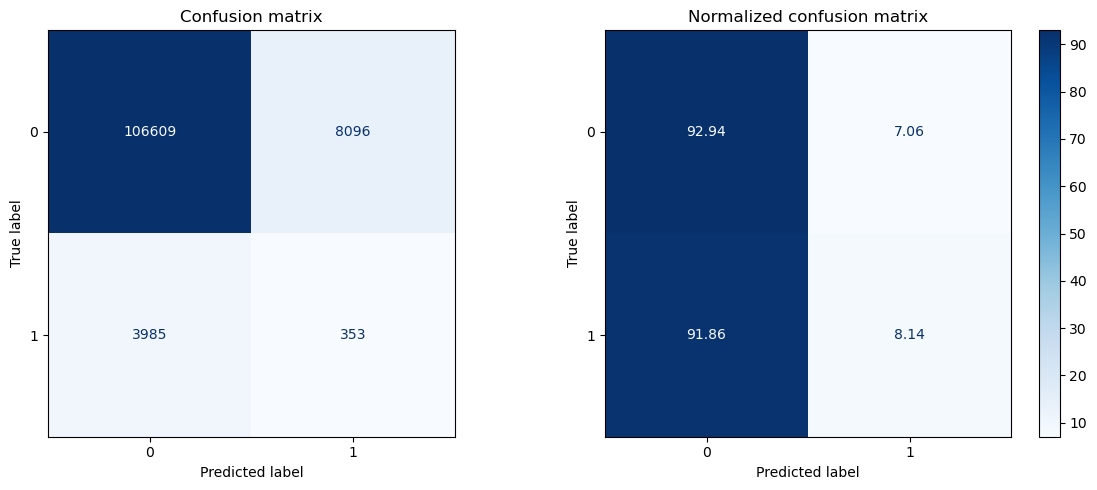

Accuracy: 0.8985
F1-score: 0.0552


In [72]:
print("SMOTE:\n")
print_results(y_val, y_smote)

RandomUnderSampler:



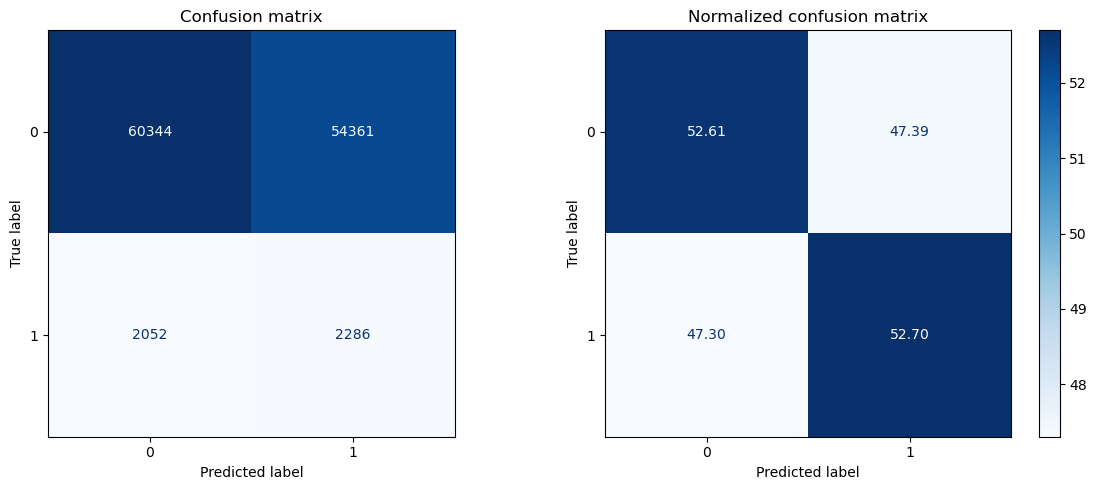

Accuracy: 0.5261
F1-score: 0.0750


In [74]:
print("RandomUnderSampler:\n")
print_results(y_val, y_pred_rus)

SMOTE does not significantly change the results: accuracy remains high and F1-score stays low. RandomUnderSampler improves the F1-score by making predictions more balanced, but this leads to a notable drop in overall accuracy.

## Feature engineering

The dataset contains missing values encoded as -1. For numerical features, these missing values will be replaced using the median calculated from the available data. For categorical features, we could also compute missing values, but this would require more advanced techniques (e.g., KNN imputation), which is more time-consuming. 
Before performing any imputation, we will create indicator features showing whether a value was originally missing. 
After the imputation step, we will group numerical features by their prefixes and compute the mean and standard deviation within each group.

In [76]:
X_train_fe = X_train.copy()
X_val_fe = X_val.copy()

In [78]:
features_with_missing_values = [c for c in X.columns.tolist() if (X_train[c] == -1).any()]
features_with_missing_values

['xind_02_cat',
 'xind_04_cat',
 'xind_05_cat',
 'xreg_03',
 'xcar_01_cat',
 'xcar_02_cat',
 'xcar_03_cat',
 'xcar_05_cat',
 'xcar_07_cat',
 'xcar_09_cat',
 'xcar_11',
 'xcar_12',
 'xcar_14']

In [80]:
X.replace(-1, np.nan)[features_with_missing_values].isnull().sum().sort_values(ascending=False)

xcar_03_cat    411231
xcar_05_cat    266551
xreg_03        107772
xcar_14         42620
xcar_07_cat     11489
xind_05_cat      5809
xcar_09_cat       569
xind_02_cat       216
xcar_01_cat       107
xind_04_cat        83
xcar_02_cat         5
xcar_11             5
xcar_12             1
dtype: int64

In [82]:
for f in features_with_missing_values:
    X_train_fe[f + "_was_missing"] = (X_train[f] == -1).astype(int)
    X_val_fe[f + "_was_missing"] = (X_val[f] == -1).astype(int)

Now we can impute missing values for numerical features. We could as well impute missing values for categorical features, for example using KNN, but it would take too much time.

In [85]:
imputer = SimpleImputer(missing_values=-1, strategy='median')
imputer.fit(X_train[num_features])
X_train_fe[num_features] = imputer.transform(X_train_fe[num_features])
X_val_fe[num_features] = imputer.transform(X_val_fe[num_features])

In [87]:
num_features

['xind_01',
 'xind_03',
 'xind_14',
 'xind_15',
 'xreg_01',
 'xreg_02',
 'xreg_03',
 'xcar_11',
 'xcar_12',
 'xcar_13',
 'xcar_14',
 'xcar_15',
 'xcalc_01',
 'xcalc_02',
 'xcalc_03',
 'xcalc_04',
 'xcalc_05',
 'xcalc_06',
 'xcalc_07',
 'xcalc_08',
 'xcalc_09',
 'xcalc_10',
 'xcalc_11',
 'xcalc_12',
 'xcalc_13',
 'xcalc_14']

In [89]:
ind_num_features = [f for f in num_features if 'xind_' in f]
reg_num_features = [f for f in num_features if 'xreg_' in f]
car_num_features = [f for f in num_features if 'xcar_' in f]
calc_num_features = [f for f in num_features if 'xcalc_' in f]

In [91]:
def add_mean_std(X_fe):
    X_fe["xind_mean"] = X_fe[ind_num_features].mean(axis=1)
    X_fe["xind_std"] = X_fe[ind_num_features].std(axis=1)

    X_fe["xreg_mean"] = X_fe[reg_num_features].mean(axis=1)
    X_fe["xreg_std"] = X_fe[reg_num_features].std(axis=1)

    X_fe["xcar_mean"] = X_fe[car_num_features].mean(axis=1)
    X_fe["xcar_std"] = X_fe[car_num_features].std(axis=1)

    X_fe["xcalc_mean"] = X_fe[calc_num_features].mean(axis=1)
    X_fe["xcalc_std"] = X_fe[calc_num_features].std(axis=1)

In [93]:
add_mean_std(X_train_fe)
add_mean_std(X_val_fe)

In [95]:
X_train_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357126 entries, 209263 to 228804
Data columns (total 78 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   xind_01                  357126 non-null  float64
 1   xind_02_cat              357126 non-null  int64  
 2   xind_03                  357126 non-null  float64
 3   xind_04_cat              357126 non-null  int64  
 4   xind_05_cat              357126 non-null  int64  
 5   xind_06_bin              357126 non-null  int64  
 6   xind_07_bin              357126 non-null  int64  
 7   xind_08_bin              357126 non-null  int64  
 8   xind_09_bin              357126 non-null  int64  
 9   xind_10_bin              357126 non-null  int64  
 10  xind_11_bin              357126 non-null  int64  
 11  xind_12_bin              357126 non-null  int64  
 12  xind_13_bin              357126 non-null  int64  
 13  xind_14                  357126 non-null  float64
 14  xind

In [97]:
clf_fe, y_pred_fe = decision_tree_train_validate(X_train_fe, y_train, X_val_fe)

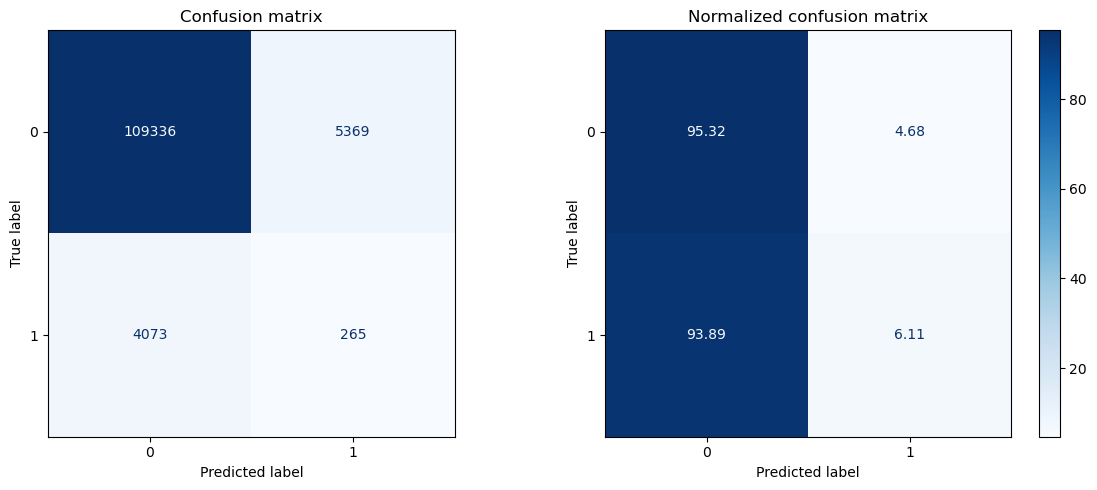

Accuracy: 0.9207
F1-score: 0.0531


In [99]:
print_results(y_val, y_pred_fe)

After applying feature engineering F1-score slightly improved.

## Feature selection

For this task, we use two approaches: 
- Tree-based method that evaluates feature importance using a decision tree model. 
- SelectKBest, which selects the top-scoring features based on statistical tests.

We will use sets after applying feature engineering

In [101]:
et_clf = ExtraTreesClassifier(class_weight="balanced", random_state=RANDOM_STATE).fit(X_train_fe, y_train)

In [103]:
model = SelectFromModel(et_clf, threshold="median", prefit=True)

In [105]:
mask = model.get_support()
selected_features = X_train_fe.columns[mask]

X_train_fs = X_train_fe[selected_features].copy()
X_val_fs = X_val_fe[selected_features].copy()

In [107]:
X_train_fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357126 entries, 209263 to 228804
Data columns (total 39 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   xind_01       357126 non-null  float64
 1   xind_03       357126 non-null  float64
 2   xind_04_cat   357126 non-null  int64  
 3   xind_15       357126 non-null  float64
 4   xreg_01       357126 non-null  float64
 5   xreg_02       357126 non-null  float64
 6   xreg_03       357126 non-null  float64
 7   xcar_01_cat   357126 non-null  int64  
 8   xcar_06_cat   357126 non-null  int64  
 9   xcar_11_cat   357126 non-null  int64  
 10  xcar_12       357126 non-null  float64
 11  xcar_13       357126 non-null  float64
 12  xcar_15       357126 non-null  float64
 13  xcalc_01      357126 non-null  float64
 14  xcalc_02      357126 non-null  float64
 15  xcalc_03      357126 non-null  float64
 16  xcalc_04      357126 non-null  float64
 17  xcalc_05      357126 non-null  float64
 18  xcal

In [109]:
clf_fs, y_pred_fs = decision_tree_train_validate(X_train_fs, y_train, X_val_fs)

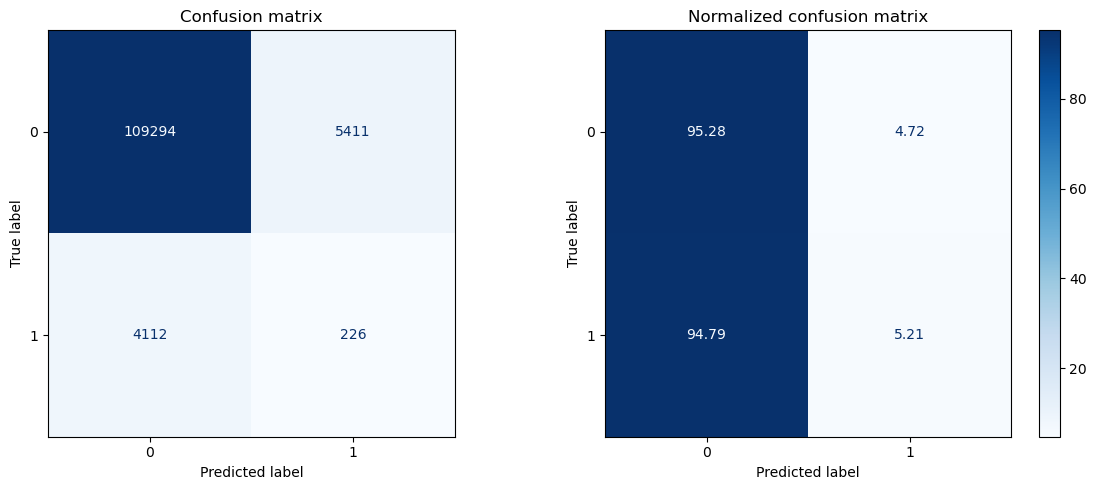

Accuracy: 0.9200
F1-score: 0.0453


In [111]:
print_results(y_val, y_pred_fs)

Tree-based method worsened F1-score.

In [114]:
k_list = [40, 45, 50]


for k = 40 : 



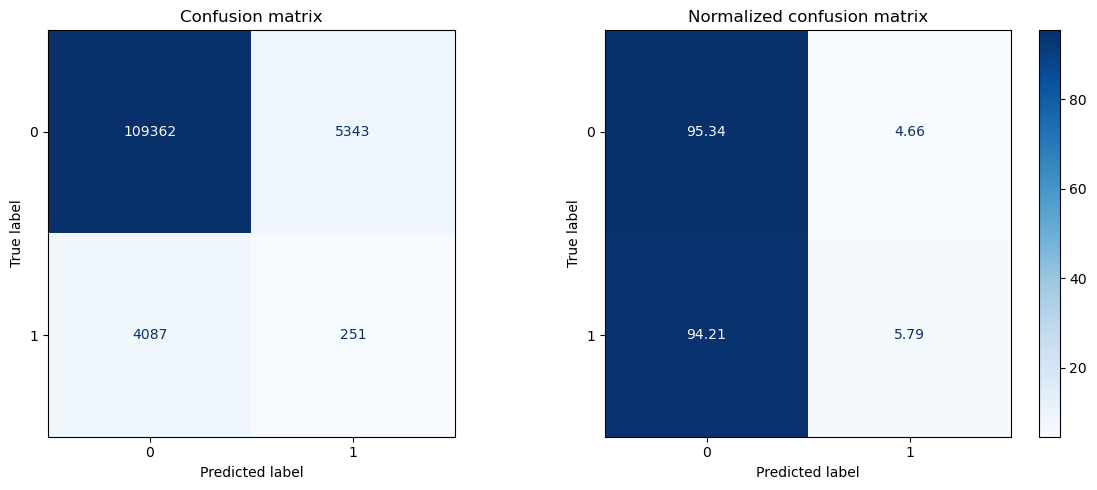

Accuracy: 0.9208
F1-score: 0.0505

for k = 45 : 



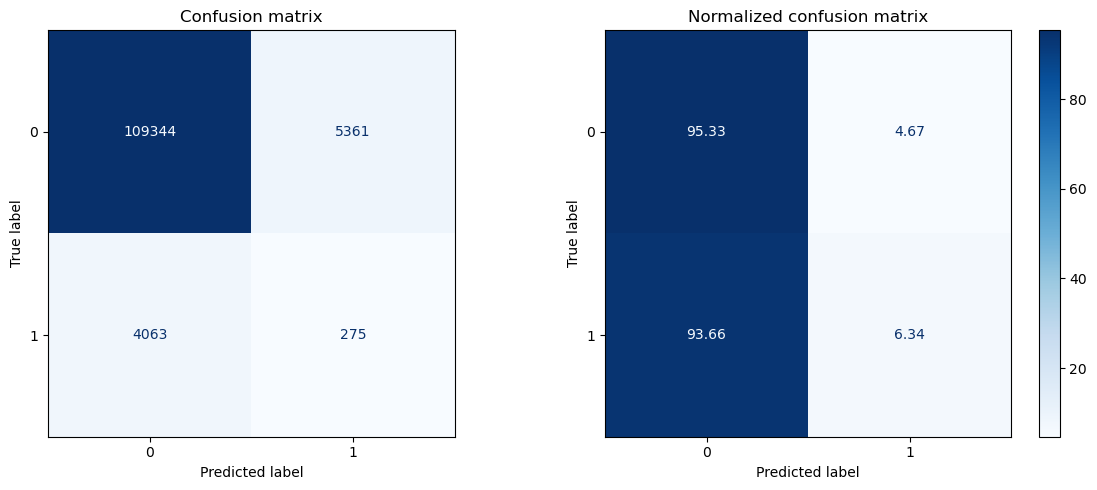

Accuracy: 0.9208
F1-score: 0.0551

for k = 50 : 



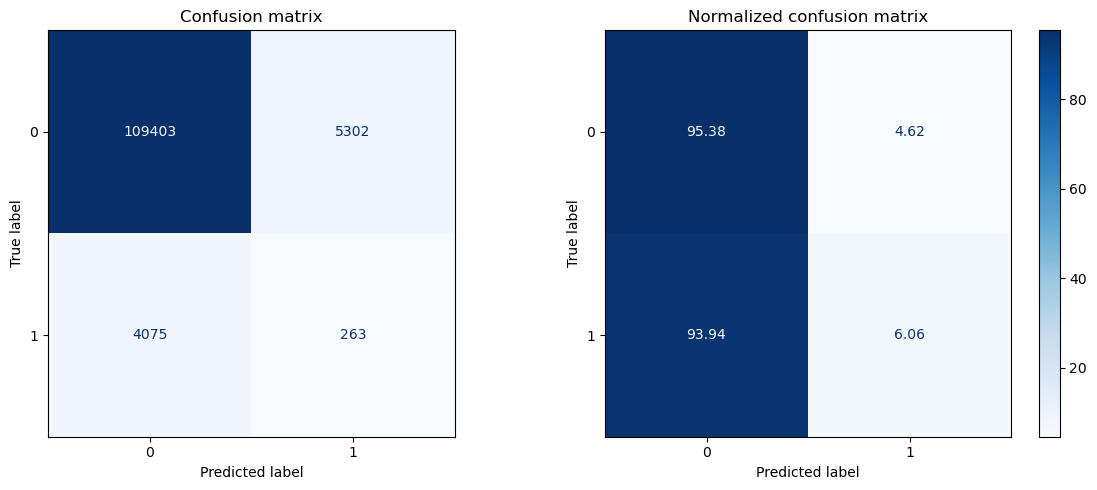

Accuracy: 0.9212
F1-score: 0.0531


In [116]:
for k in k_list:
    model_kbest = SelectKBest(k=k)
    model_kbest.fit(X_train_fe, y_train)
    mask = model_kbest.get_support()
    selected_features_kbest = X_train_fe.columns[mask]
    X_train_kb = X_train_fe[selected_features_kbest].copy()
    X_val_kb = X_val_fe[selected_features_kbest].copy()
    clf_kb, y_pred_kb = decision_tree_train_validate(X_train_kb, y_train, X_val_kb)
    print(f'\nfor k = {k} : \n')
    print_results(y_val, y_pred_kb)

As we can see SelectKBest with k = 45, gets better F1-score than 40 or 50. Other metrics remains almost the same.

In this task SelectKBest shows better results.

## PCA

Before applying PCA, let's scale sets.

We will use sets after applying feature engineering

In [118]:
scaler = StandardScaler()
scaler.fit(X_train_fe)

X_train_fe_scaled = scaler.transform(X_train_fe)
X_val_fe_scaled = scaler.transform(X_val_fe)


for 40 componets: 



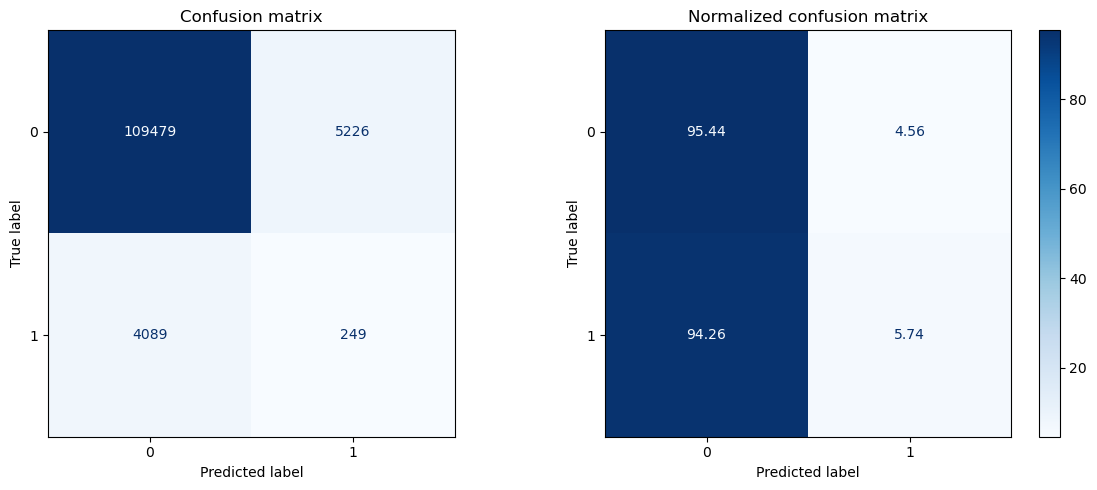

Accuracy: 0.9218
F1-score: 0.0507

for 45 componets: 



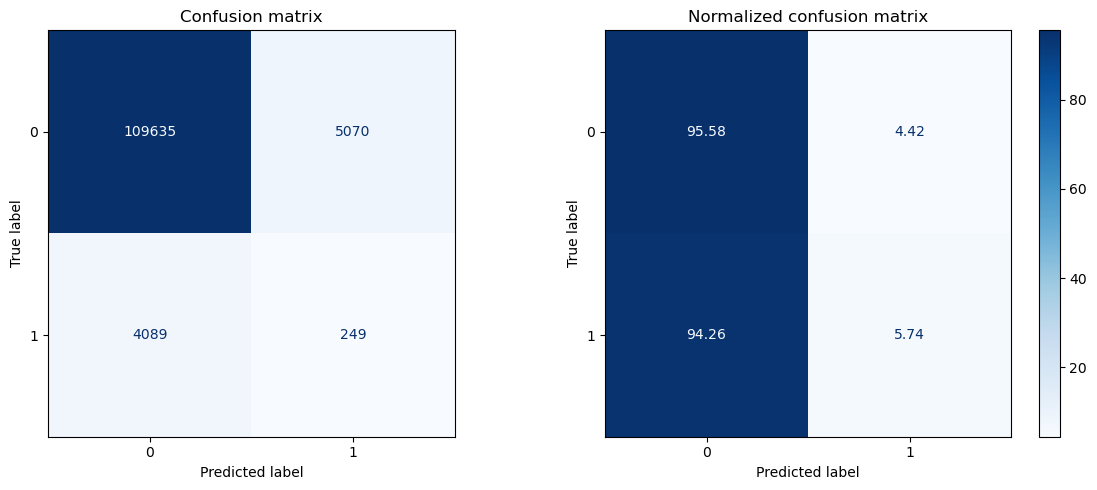

Accuracy: 0.9231
F1-score: 0.0516

for 50 componets: 



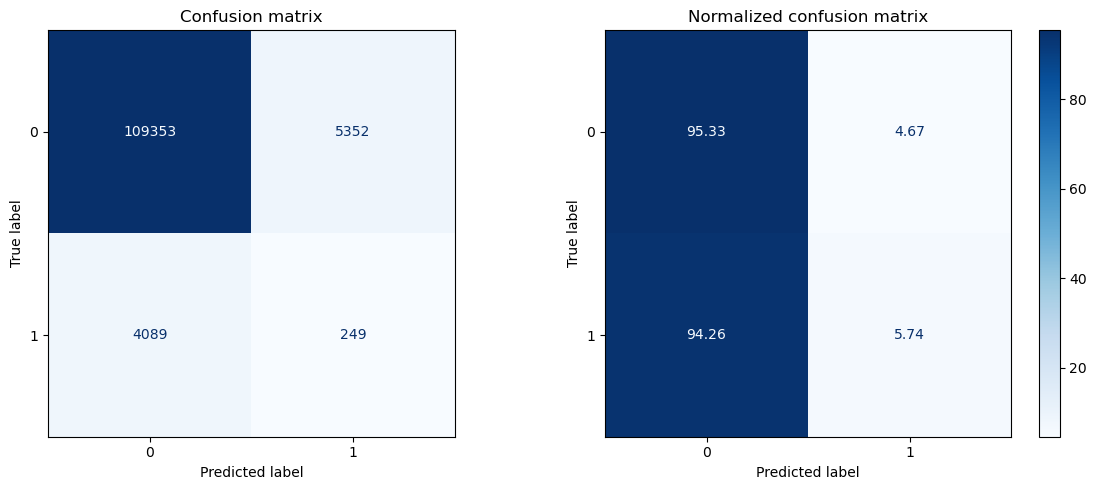

Accuracy: 0.9207
F1-score: 0.0501


In [120]:
n_components_list = [40, 45, 50]

for n in n_components_list:
    pca = PCA(n_components=n, random_state=RANDOM_STATE)
    X_train_pca = pca.fit_transform(X_train_fe_scaled)
    X_val_pca = pca.transform(X_val_fe_scaled)
    clf_pca, y_pred_pca = decision_tree_train_validate(X_train_pca, y_train, X_val_pca)
    print(f'\nfor {n} componets: \n')
    print_results(y_val, y_pred_pca)

PCA with 45 components shows the highest F1-score that with 40 or 50. Other metrics remains almost the same.

## Combining

In this task we will combine techniques that we used earlier. 

We will use feature selection instead of PCA, because it showed better results.
We won't use binning methods, because they didn't show any improvements.

For balancing technique we will use both SMOTE and RandomOverSampler.

Pipeline looks like this: 
Feature enginnering -> Feature selection -> balancing.

In [122]:
X_train_final = X_train_fe
X_val_final = X_val_fe
X_test_final = X_test.copy()

Feature engineering for test set

In [125]:
for f in features_with_missing_values:
    X_test_final[f + "_was_missing"] = (X_test[f] == -1).astype(int)

X_test_final[num_features] = imputer.transform(X_test_final[num_features])
add_mean_std(X_test_final)

Feature selection.

In [128]:
model_kbest = SelectKBest(k=45)
model_kbest.fit(X_train_fe, y_train);

In [130]:
mask = model_kbest.get_support()
selected_features_kbest = X_train_final.columns[mask]
X_train_final = X_train_final[selected_features_kbest].copy()
X_val_final = X_val_final[selected_features_kbest].copy()
X_test_final = X_test_final[selected_features_kbest].copy()

Balancing.

In [133]:
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_train_bal, y_train_bal = rus.fit_resample(X_train_final, y_train)

Training classifier

In [136]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train_bal, y_train_bal);

Validation set: 



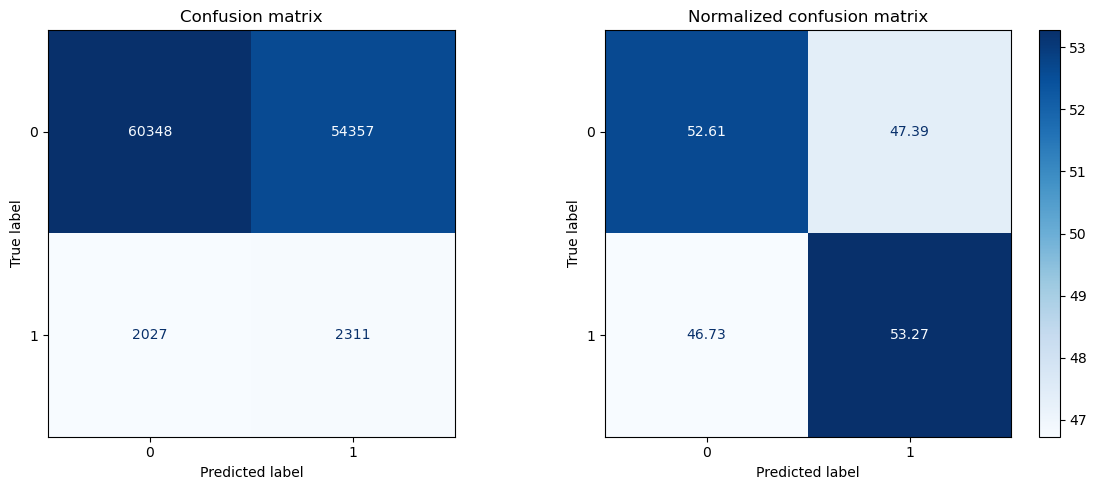

Accuracy: 0.5264
F1-score: 0.0758


In [138]:
y_val_pred = clf.predict(X_val_final)
print('Validation set: \n')
print_results(y_val, y_val_pred)

Test set: 



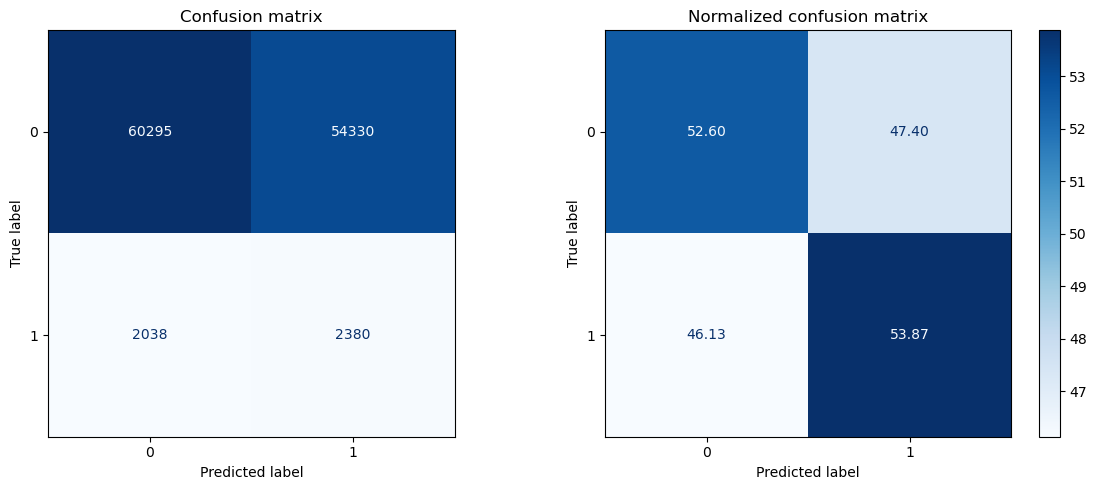

Accuracy: 0.5265
F1-score: 0.0779


In [140]:
y_test_pred = clf.predict(X_test_final)
print('Test set: \n')
print_results(y_test, y_test_pred)

The final model achieves moderate accuracy and a low F1-score. The confusion matrix shows that the classifier predicts both labels almost equally often, but performance on each class remains weak. For label 0, only 52.6% of samples are classified correctly, and for label 1 the model reaches 53.87% correctness.

Comparing with first result, we have imporved F1-score by 0.0271, but our accuracy dropped by 0.3919.

Now let's check SMOTE

In [144]:
smote = SMOTE(random_state=RANDOM_STATE)
X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

In [146]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train_bal, y_train_bal);

Validation set: 



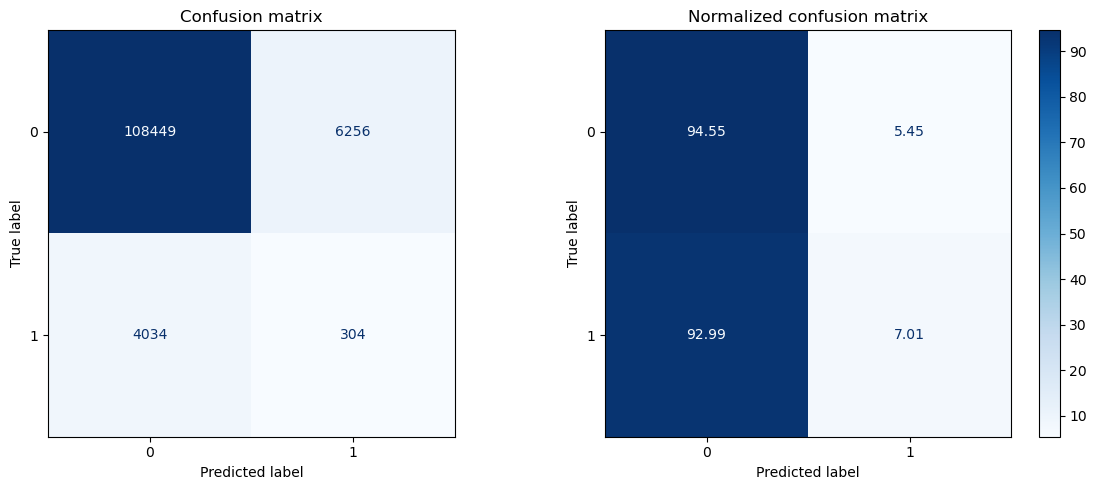

Accuracy: 0.9136
F1-score: 0.0558


In [147]:
y_val_pred = clf.predict(X_val_final)
print('Validation set: \n')
print_results(y_val, y_val_pred)

Test set: 



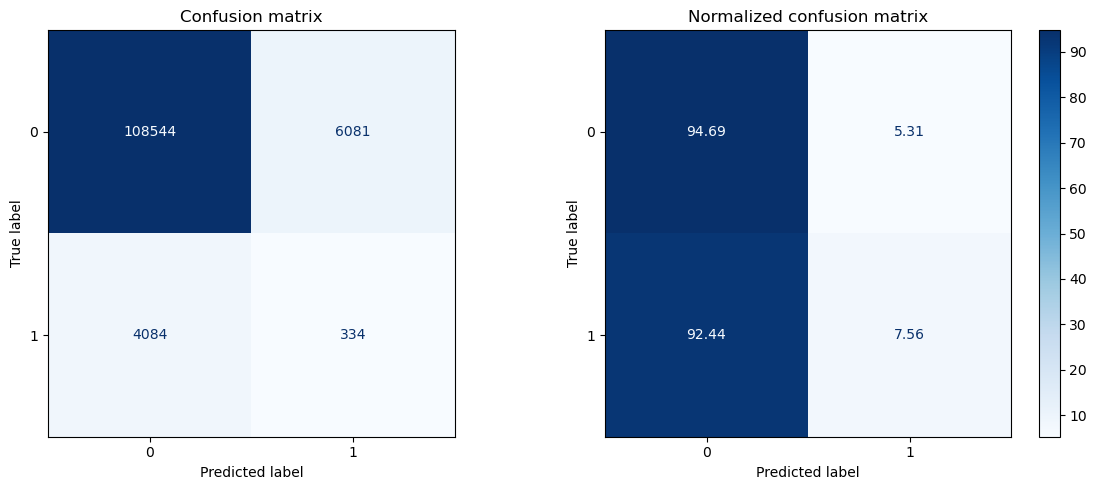

Accuracy: 0.9146
F1-score: 0.0617


In [150]:
y_test_pred = clf.predict(X_test_final)
print('Test set: \n')
print_results(y_test, y_test_pred)

After applying SMOTE, the model achieves higher accuracy, but F1-score is lower. The confusion matrix shows that the classifier continues to predict label 0 in most cases(94.69%), while detecting only about 7.56% of label 1.

We have imporved F1-score by 0.0109, but our accuracy dropped by 0.0038.